# Network Generation and ID extraction
#### In this first section we show how to compute the ID from a given network. We will also reproduce the graphs (and their ID) of the first picture of the paper

In [1]:
import sys
sys.path.append('../abc-net/')
import graph_operations as go
import generators as gen
import graph_tool as gt
import graph_tool.draw as gtd

Generate a network and compute the distances between nodes and store them into a dadapy.IdDiscrete object, which contains the routine to estimate the ID

In [2]:
erdos_renyi = gen.build_erdosh_reny(1000,0.004)
I3D, idx = go.gt_to_ide(erdos_renyi, d_max=15)

Distances are stored in I3D.distance in a cumulative fashion: at position j we have the total number of vertices up to that distance. At distance 0 we have just the vertex itself, at distances larger than the diameter all points are included. Let's look what happens for vertex 0:

In [3]:
I3D.distances[0]

array([  1,   9,  38, 135, 432, 818, 963, 977, 978, 978, 978, 978, 978,
       978, 978, 978])

Now we can proceed to compute the ID at a specific radius, by selecting manually the scale 

In [4]:
I3D.compute_id_binomial_lk(4,3, method='mle')

(5.779456462179363, 0.020434299665238097, 4)

or, we can compute them at any scale in one shot:

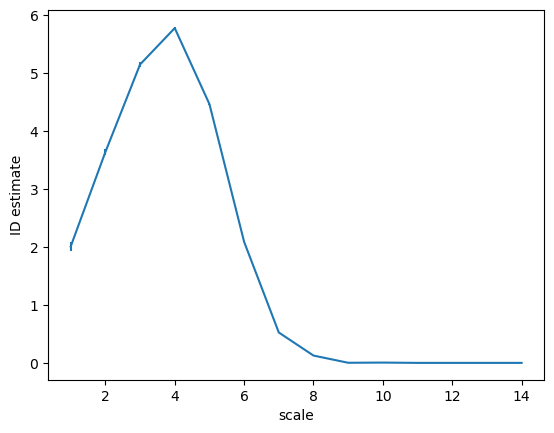

In [5]:
id, id_error = I3D.return_id_scaling(range(1,15),r=0.9)

We can also compute a whole series of observables from the network:

In [6]:
obs = go.extract_observables(erdos_renyi)

In [7]:
print(f"diameter: {obs['diameter']:d}\nID: {obs['ID']}")

diameter: 10
ID: [2.01e+00 3.64e+00 5.15e+00 5.78e+00 4.47e+00 2.09e+00 5.25e-01 1.27e-01
 2.86e-03 6.23e-03]


Now you can play for instance with geometric networks, graph obtained from point embedded in eublidean spaces. If no points are provided, those are sampled uniformly from an hyperplane in d dimension, embedded in D dimension and a noise is added. You can decide to connect the vertices according to:
- a given radius
- a fixed number of neighbours
- a number of neighbours extracted from a poisson distribution with given intensity

In [10]:
g1 = gen.build_geom_net(n=2000,d=2,D=10,noise=0.001,lambda_poisson=3.5)

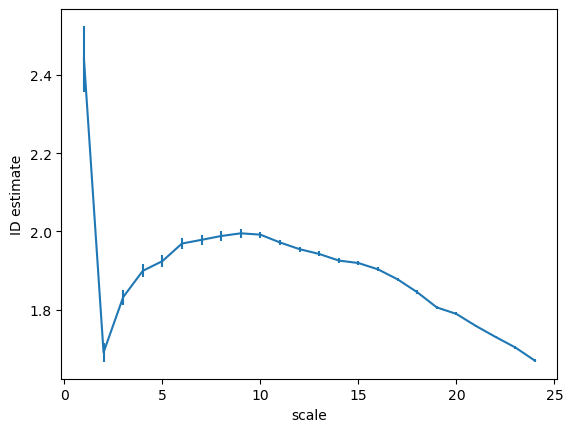

In [14]:
id1,_ = go.gt_to_ide(g1)
id1.return_id_scaling(range(1,25),r=0.8);